# Reinforcement Learning
Prof. Milica Gašić

### Monte Carlo and Temporal Difference Prediction



#### Implementation

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from random import random
import matplotlib
import matplotlib.pyplot as plt


We have implemented the environment for generating random walk episodes below. 

In [16]:
def random_walk_rollout(n_states=5, left_reward=0, right_reward=1):
    terminal_states = [0, n_states-1]
    s = n_states//2 # start in the middle
    e = [s]   # episode
    while s not in terminal_states:
        # do random action 'right' or 'left'
        s += 1 if random() > 0.5 else -1     # next state
        if s == n_states - 1:
            r = right_reward
        elif s == 0:
            r = left_reward
        else:
            r = 0
        e.extend([float(r), s])
    return e

Your task is to implement value iteration for computing value estimates for the episodes. Start with update per episode, and then call the function in a loop.

In [20]:
def MC_step_inc(V, e, gamma, alpha):
    #######################################################################
    # TODO  implement monte carlo prediction update for one episode       #
    #######################################################################
    T = len(e)
    g = 0.0
    for t in reversed(range(0, T-1, 2)):
        s, r = e[t], e[t+1]
        g = r + gamma * g
        V[s] += alpha * (g - V[s])
    #######################################################################
    # End of your code.                                                   #
    #######################################################################



def TD_step(V, e, gamma, alpha):
    #######################################################################
    # TODO  implement TD prediction update for one episode                #
    #######################################################################
    T = len(e)
    for t in range(0, T-1, 2):
        s, r, s_prime = e[t], e[t+1], e[t+2]
        V[s] += alpha * (r + gamma * V[s_prime] - V[s])
    #######################################################################
    # End of your code.                                                   #
    #######################################################################

We would like to track how our value estimates converge over time. Complete the code below using the functions you have implemented above.

In [21]:

def RMSError(v0, v1):
    return np.sqrt(((v0-v1)**2).mean())

def mc_compute_v(n_episodes, n_states, alpha, maxiter):

    for k in range(maxiter):
        # roll out episodes
        episodes = []
        for _ in range(n_episodes):
            episodes.append(random_walk_rollout(n_states = n_states))

        #initialize containers
        rms = np.zeros(n_episodes)
        v = np.zeros(n_states)
        
        #######################################################################
        # TODO loop through the episodes and                                  #
        # call the episode-wise MC update you have implemented above          #
        # AND maintain a list rms tracking the RMS error of the estimate.     #
        # Note: we repeat this process k amount of times and take the         #
        # average rms for plotting                                            #
        #######################################################################

        for n in range(n_episodes):
            MC_step_inc(v, episodes[n], gamma, alpha)
            rms[n] += RMSError(v, v_true) / n_states
            
        #######################################################################
        # End of your code.                                                   #
        #######################################################################
    
    rms /= maxiter # averaging
    
    return v, rms
    

def td_compute_v(n_episodes, n_states, alpha, maxiter):

    for k in range(maxiter):
        # roll out episodes
        episodes = []
        for _ in range(n_episodes):
            episodes.append(random_walk_rollout(n_states = n_states))
            
        n_episodes = len(episodes)
        rms = np.zeros(n_episodes)
        v = np.zeros(n_states)
        
        #######################################################################
        # TODO call the episode-wise TD update you have implemented above     #
        # and maintain a list tracking the RMS error of the estimate          #
        # Note: we repeat the computation k amount of times and take the      #
        # average rms for plotting                                            #
        #######################################################################

        for n in range(n_episodes):
            TD_step(v, episodes[n], gamma, alpha)
            rms[n] += RMSError(v, v_true) / n_states

        #######################################################################
        # End of your code.                                                   #
        #######################################################################
    
    rms /= maxiter # averaging
    
    return v, rms
    

Call the functions above to answer the questions:
* How does MC and TD differs?
* What is the influence of alpha on the convergence?


====== MC ======

alpha:0.001
[0.         0.15831016 0.44880394 0.48642592 0.        ]
alpha:0.002
[0.         0.23406576 0.51547    0.6590672  0.        ]
alpha:0.004
[0.         0.26202893 0.51146793 0.71153883 0.        ]

====== TD ======

alpha:0.01
[0.         0.25324279 0.49866354 0.75474971 0.        ]
alpha:0.02
[0.         0.24099247 0.51162756 0.74063878 0.        ]
alpha:0.05
[0.         0.37554246 0.58928585 0.78397606 0.        ]
alpha:0.1
[0.         0.26957872 0.55097483 0.73101034 0.        ]


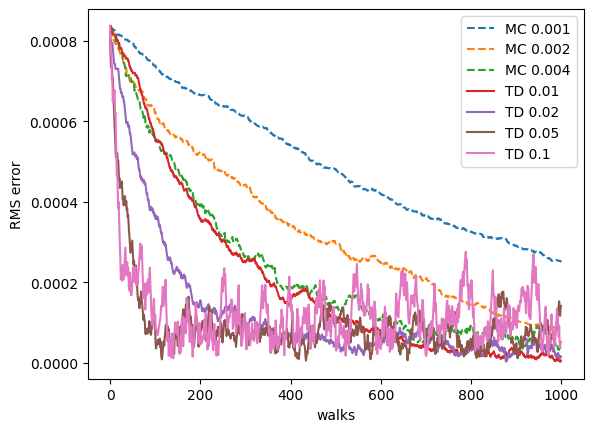

In [25]:
episodes = []

gamma = 1.0
n_states = 5
n_episodes = 1000
maxiter = 100

mc_alphas=[0.001, 0.002, 0.004]
td_alphas=[0.01, 0.02, 0.05, 0.1]

v_true = [0, 1/4, 2/4, 3/4, 0]

# rollout episodes
#for _ in range(n_episodes):
#    episodes.append(random_walk_rollout(n_states = n_states))

# value estimates with MC:
print("\n====== MC ======\n")
for alpha in mc_alphas:
    print(f"alpha:{alpha}")
    v, rms = mc_compute_v(n_episodes, n_states, alpha, maxiter)
    plt.plot(rms, '--', label=f'MC {alpha}')
    print(v)

# value estimates with TD:
print("\n====== TD ======\n")
for alpha in td_alphas:
    print(f"alpha:{alpha}")
    v, rms = td_compute_v(n_episodes, n_states, alpha, maxiter)
    plt.plot(rms, label=f'TD {alpha}')
    print(v)

plt.xlabel('walks')
plt.ylabel('RMS error')
plt.legend()
plt.show()